In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
yf.pdr_override()
%matplotlib inline
# !pip install yfinance --user

In [2]:
start = dt.datetime(2020, 8, 1)
# start = dt.datetime.strptime('2020-07-01', '%Y-%m-%d')
end = dt.datetime(2023, 2, 1)
# end = dt.datetime.strptime('2023-2-1', '%Y-%m-%d')
stocks = ['IFX.DE']
stock_df = pdr.get_data_yahoo(stocks, start, end)


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,21.389999,21.785000,21.190001,21.660000,21.156170,6691103
2020-08-04,22.500000,22.900000,22.110001,22.205000,21.688492,7511327
2020-08-05,22.235001,22.760000,21.525000,21.825001,21.317331,6817667
2020-08-06,21.900000,22.190001,21.340000,21.514999,21.014542,5895037
2020-08-07,21.600000,22.040001,21.344999,22.040001,21.527330,4546756


<Axes: xlabel='Date'>

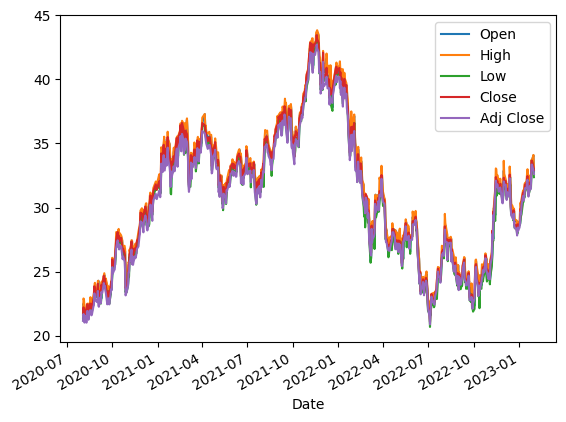

In [4]:
stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot()

### Questions
1. How to tell if product is active or not?
2. How to deal with NA values? (https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8)
3. 

### Notes
1. All products are active

In [5]:
df = pd.read_csv("20230411_SummerTerm23_Data_Challenge_Infineon_Data.csv", parse_dates=['reporting_time'])
df = df.set_index('reporting_time')
df = df[df['planning_method_latest']!='no Plan']
# (75088, 21) # original shape
# (61756, 21) no cancelled products
df.tail()

,product_name,demand,demand_lb,demand_ub,direct_demand_avg_perc,disti_demand_avg_perc,direct_customer_avg_count,disti_customer_avg_count,product_application,product_main_family,...,product_basic_type,planning_method_latest,planning_method_reporting_month,external1,external2,external3,external4,external5,external6,external7
reporting_time,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:00:00+00:00,P999,19500.0,15000.0,22500.0,86.8,13.2,1.0,0.6,gelb,D,...,BT124,ramp down,ramp down,0.742518,2.650896,2.111002,-1.489762,0.078002,-0.895806,-3.331131
2022-11-01 00:00:00+00:00,P999,18000.0,15000.0,20000.0,85.0,15.0,1.0,0.6,gelb,D,...,BT124,ramp down,ramp down,-0.462034,1.391819,1.226013,-2.026119,-0.536265,-0.992736,-3.157752
2022-12-01 00:00:00+00:00,P999,18000.0,15000.0,20000.0,71.8,28.2,1.4,1.0,gelb,D,...,BT124,ramp down,ramp down,-0.914466,2.380631,2.602714,-2.429111,-0.887274,-1.033117,-3.713951
2023-01-01 00:00:00+00:00,P999,7500.0,0.0,12500.0,60.0,0.0,0.6,0.0,gelb,D,...,BT124,ramp down,ramp down,-1.072853,1.001586,-1.647838,-2.610286,0.078002,-0.751482,-1.881083
2023-02-01 00:00:00+00:00,P999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gelb,D,...,BT124,ramp down,ramp down,-1.006698,2.965891,-0.327872,-2.751754,0.780021,-0.709725,-1.622502


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61756 entries, 2020-08-01 00:00:00+00:00 to 2023-02-01 00:00:00+00:00
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_name                     61756 non-null  object 
 1   demand                           61756 non-null  float64
 2   demand_lb                        61756 non-null  float64
 3   demand_ub                        61756 non-null  float64
 4   direct_demand_avg_perc           61756 non-null  float64
 5   disti_demand_avg_perc            61756 non-null  float64
 6   direct_customer_avg_count        61756 non-null  float64
 7   disti_customer_avg_count         61756 non-null  float64
 8   product_application              61628 non-null  object 
 9   product_main_family              61756 non-null  object 
 10  product_marketing_name           61756 non-null  object 
 11  product_basic_type               

In [7]:
df['product_application'].value_counts()

blau     28204
gelb     26218
rot       5289
Other     1917
Name: product_application, dtype: int64

In [8]:
df['product_main_family'].value_counts()

A        13003
B         8270
E         4715
C         4705
D         4402
G         3953
F         3294
H         3150
I         2111
K         2011
J         1778
L         1761
M         1254
N          843
Q          817
Other      815
R          808
T          756
O          665
V          566
X          507
Y          449
S          347
P          297
Z          294
U          185
Name: product_main_family, dtype: int64

In [9]:
df['product_name'].value_counts() # cannot use for time series as some product names only have 1 entry

P1875    54
P269     54
P277     54
P276     54
P275     54
         ..
P444      2
P446      2
P314      2
P106      2
P114      2
Name: product_name, Length: 1537, dtype: int64

In [10]:
df['product_marketing_name'].value_counts()

katze      29526
hund       22352
maus        5215
Missing     2999
fisch       1074
Other        590
Name: product_marketing_name, dtype: int64

In [11]:
df['product_basic_type'].value_counts() # cannot use for time series as some product basic types only have 1 entry

BT119    807
BT124    763
BT344    756
BT118    736
BT342    716
        ... 
BT451      1
BT452      1
BT422      1
BT406      1
BT448      1
Name: product_basic_type, Length: 410, dtype: int64

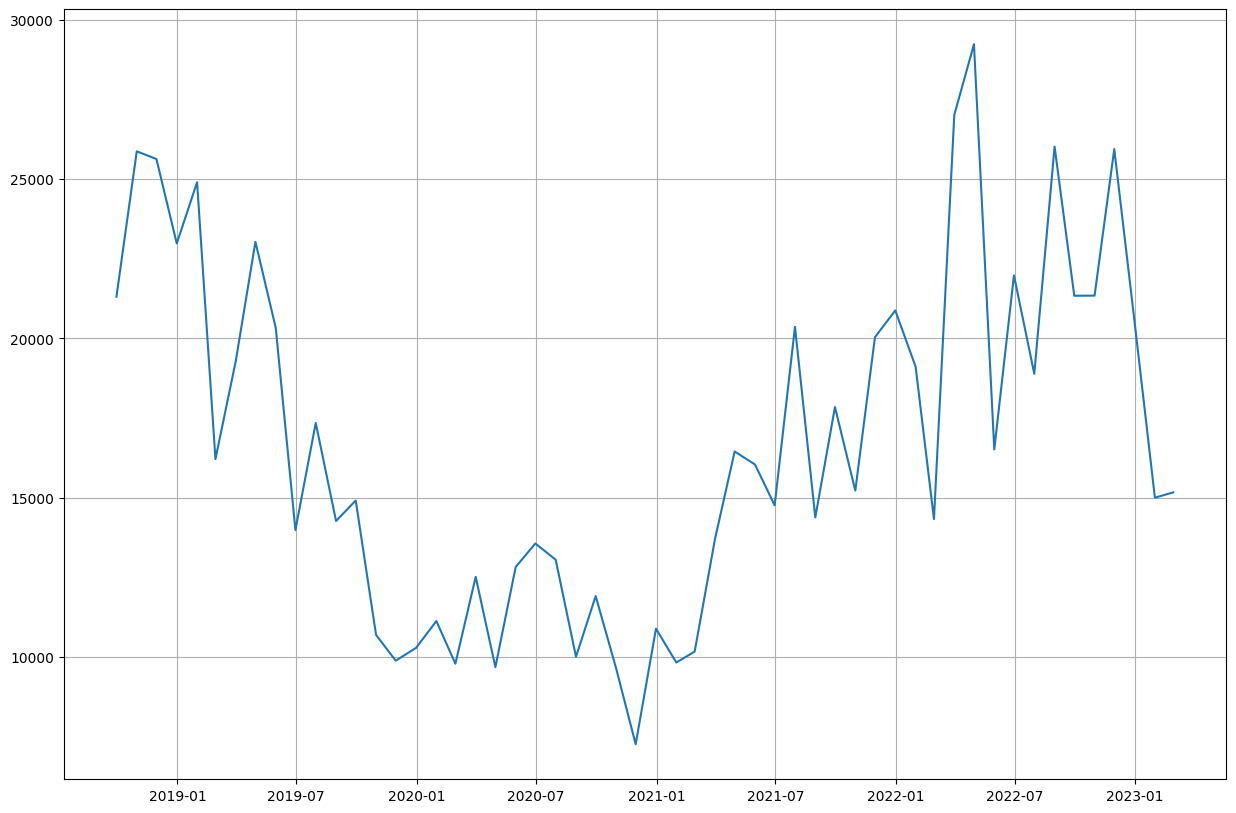

In [12]:
df_sample = df[df['product_marketing_name'] == 'maus'].dropna()
test_series = df_sample.demand.resample('M').mean()
test_exog_df = df_sample[['external1', 'external2', 'external3', 'external4', 'external5', 'external6', 'external7']].resample('M').mean()
# test_series = test_series.diff().iloc[1:]
# test_exog_df = test_exog_df.diff().iloc[1:]
plt.figure(figsize=(15,10))
plt.plot(test_series)
plt.grid()
plt.show()

In [13]:
# test_exog_df

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


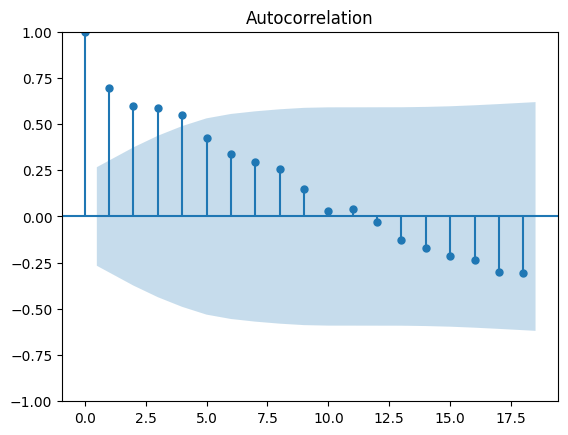

In [15]:
acf_plot = plot_acf(test_series)

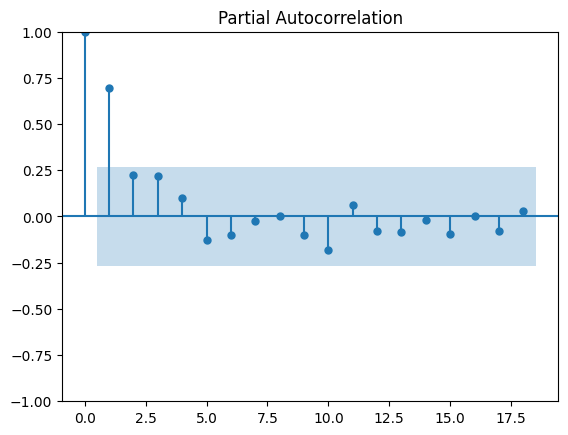

In [16]:
pcf_plot = plot_pacf(test_series)

In [17]:
result = adfuller(test_series, maxlag = 5)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9827527483374285
n_lags: 2
p-value: 0.29418624112970043
Critial Values:
   1%, -3.5656240522121956
Critial Values:
   5%, -2.920142229157715
Critial Values:
   10%, -2.598014675124952


In [20]:
train_prop = 0.7
valid_prop = 0.1
validation_prop = 1-train_prop-valid_prop

train_set = test_series.iloc[:int(len(test_series)*train_prop)]
valid_set = test_series.iloc[int(len(test_series)*train_prop): int(len(test_series)*(train_prop+valid_prop))]
test_set = test_series.iloc[int(len(test_series)*(train_prop+valid_prop)):]

train_exog = test_exog_df.iloc[:int(len(test_exog_df)*train_prop)]
valid_exog = test_exog_df.iloc[int(len(test_exog_df)*train_prop): int(len(test_exog_df)*(train_prop+valid_prop))]
# test_exog

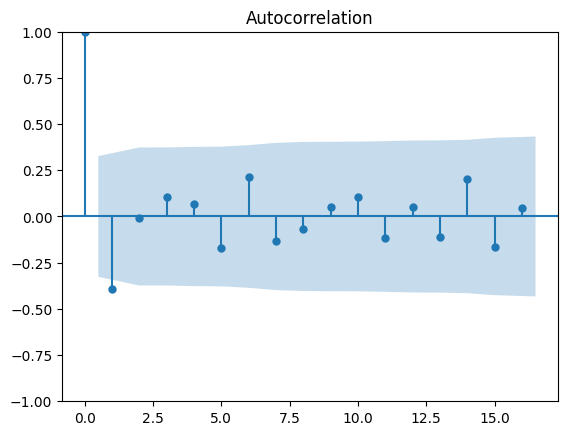

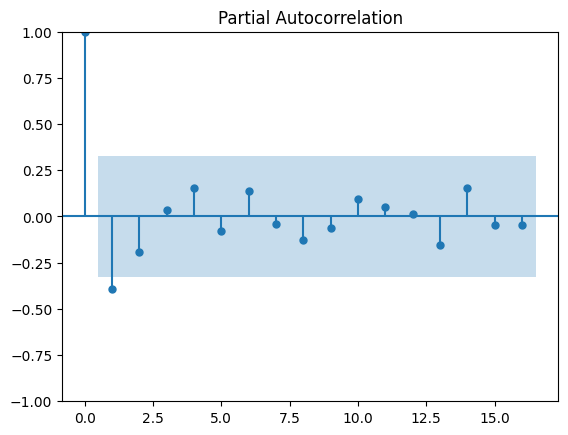

In [21]:
train_set_1 = test_series.iloc[:int(len(test_series)*train_prop)].diff().iloc[1:]
acf = plot_acf(train_set_1)
pacf = plot_pacf(train_set_1)

In [22]:
result = adfuller(train_set_1, maxlag = 5)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.984915212301495
n_lags: 0
p-value: 7.14403067349641e-15
Critial Values:
   1%, -3.6327426647230316
Critial Values:
   5%, -2.9485102040816327
Critial Values:
   10%, -2.6130173469387756


In [23]:
model = ARIMA(train_set, order= (result[2], 0, 1), exog = train_exog)

In [24]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                   37
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -346.007
Date:                Thu, 22 Jun 2023   AIC                            712.013
Time:                        15:34:51   BIC                            728.122
Sample:                    09-30-2018   HQIC                           717.692
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.878e+04   1300.031     14.449      0.000    1.62e+04    2.13e+04
external1   1164.6397   2185.113      0.533      0.594   -3118.103    5447.382
external2   -278.5199   2336.434     -0.119      0.9

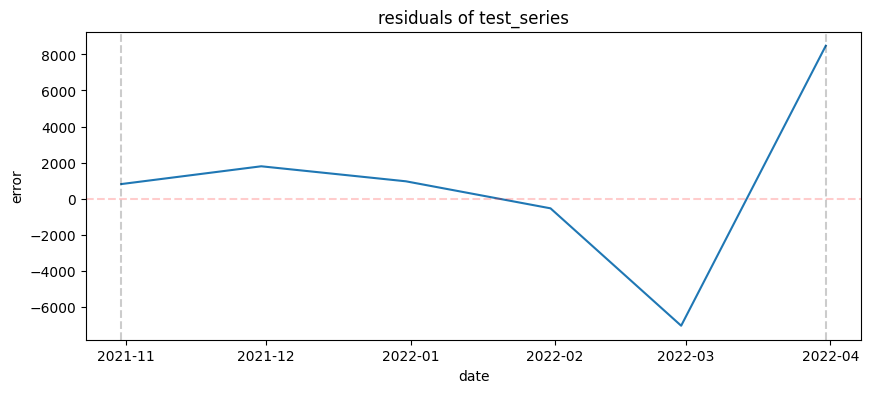

In [25]:
predictions = model_fit.predict(start = valid_set.index[0], end = valid_set.index[-1], exog = valid_exog)
residuals = valid_set-predictions
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title('residuals of test_series')
plt.ylabel('error')
plt.xlabel('date')
plt.axhline(0, color= 'r', linestyle = '--', alpha = 0.2)
plt.axvline(valid_set.index[0], color ='k', linestyle = '--', alpha = 0.2)
plt.axvline(valid_set.index[-1], color ='k', linestyle = '--', alpha = 0.2)

plt.show()

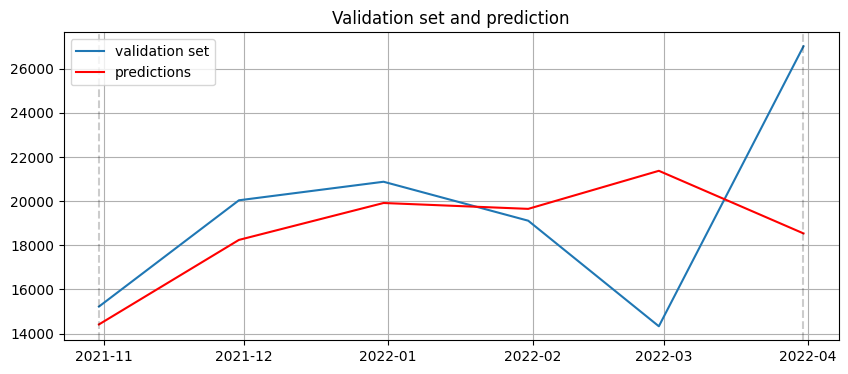

In [26]:
plt.figure(figsize=(10,4))
plt.plot(valid_set, label = 'validation set')
plt.plot(predictions, color = 'r', label = 'predictions')
plt.title('Validation set and prediction')
plt.axvline(valid_set.index[0], color ='k', linestyle = '--', alpha = 0.2)
plt.axvline(valid_set.index[-1], color ='k', linestyle = '--', alpha = 0.2)
plt.legend(loc = "upper left")
plt.grid()

In [27]:
rmse = np.sqrt(np.mean(residuals**2))
print(f"Root mean squared error: {rmse}")

Root mean squared error: 4594.575552212426


In [28]:
valid_set

reporting_time
2021-10-31 00:00:00+00:00    15223.421488
2021-11-30 00:00:00+00:00    20039.986885
2021-12-31 00:00:00+00:00    20880.404918
2022-01-31 00:00:00+00:00    19114.977778
2022-02-28 00:00:00+00:00    14330.347619
2022-03-31 00:00:00+00:00    27019.584127
Freq: M, Name: demand, dtype: float64

<Axes: >

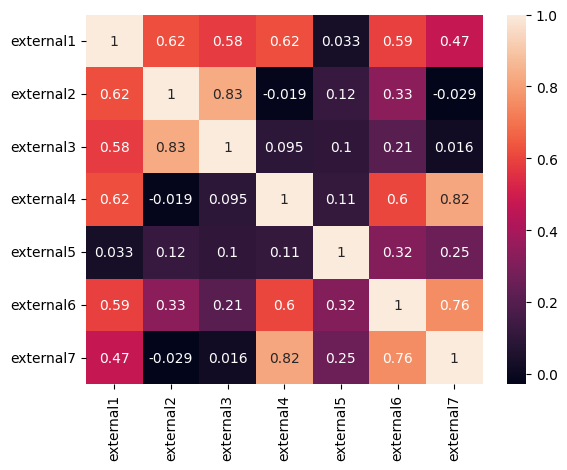

In [29]:
sns.heatmap(df[['external1', 'external2', 'external3', 'external4', 'external5', 'external6', 'external7']].corr(), annot= True)